# **Alpha Irradiation analysis**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from utils import *

## **Notebook constants**

In [2]:
PLOT_RANGES = True
DICT_KEYS = ["0", "50", "200"]
DATA_DIRECTORY = "/Users/giorgio/Data/darkroom/"
PLOT_DIRECTORY = "/Users/giorgio/Plots/darkroom/alpha_irradiation/"

delta_curr_dict = {key:{} for key in DICT_KEYS}
delta_curr_err_dict = {key:{} for key in DICT_KEYS}

baseline_curr_dict = {key:{} for key in DICT_KEYS}
baseline_curr_err_dict = {key:{} for key in DICT_KEYS}

time_const_dict = {key:{} for key in DICT_KEYS}
time_const_err_dict = {key:{} for key in DICT_KEYS}


## **Alpha HV linearity for all 4 diamonds**

### All 4 diamonds with negative bias

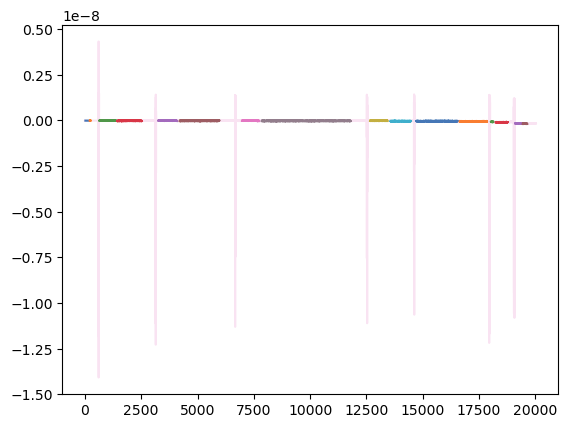

In [3]:
run4_filedir = DATA_DIRECTORY + "Eris_run004.txt"

time, voltage, mean_current, mean_current_err = load_data(run4_filedir)

voltage_idx =  (
    (60, 230, 245, 281),
    (685, 1390, 1453, 2510),
    (3233, 4028, 4149, 5849),
    (6843, 7578, 7694, 11500),
    (12352, 13100, 13230, 14100),
    (14353, 16123, 16218, 17390),
    (17600, 17700, 17808, 18316),
    (18680, 18980, 19000, 19200),
)

baseline_curr_neg, baseline_curr_err_neg, delta_curr_neg, delta_curr_err_neg = process_current_irradiation(
    time, mean_current, mean_current_err, voltage_idx, use_abs=False
)

if PLOT_RANGES:
    plot_irradiation_ranges(time, mean_current, voltage_idx)

### All 4 diamonds with positive bias

Text(0.5, 1.03, 'Raw Current Response (Amsterdam @ 200 V)')

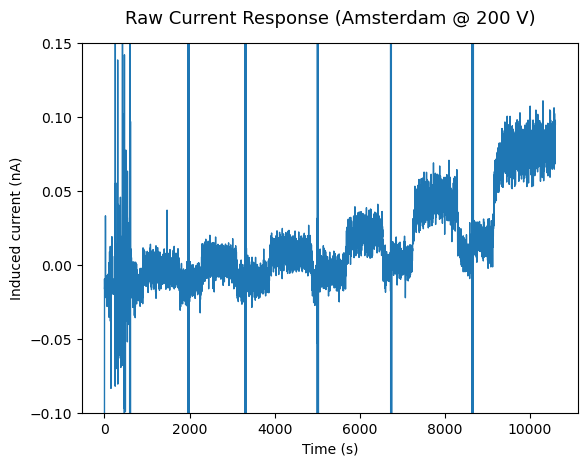

In [4]:
run2_filedir = DATA_DIRECTORY + "Eris_run002.txt"

time, voltage, mean_current, mean_current_err = load_data(run2_filedir)

voltage_idx = [
    (20, 80, 300, 500),
    (737, 888, 927, 1724),
    (2023, 2208, 2296, 3000),
    (3364, 3751, 3842, 4723),
    (5032, 5544, 5625, 6359),
    (6648, 7105, 7459, 8100),
    (8509, 8950, 9481, 10440),
]

baseline_curr_pos, baseline_curr_err_pos, delta_curr_pos, delta_curr_err_pos = process_current_irradiation(
    time, mean_current, mean_current_err, voltage_idx, use_abs=False
)

plt.plot(time, mean_current*1e9, lw=1,)
plt.ylim((-0.1, 0.15))
plt.xlabel("Time (s)")
plt.ylabel("Induced current (nA)")
plt.title("Raw Current Response (Amsterdam @ 200 V)", y=1.03, fontsize=13)

# if PLOT_RANGES:
#     plot_irradiation_ranges(time, mean_current, voltage_idx)

## **Alpha HV linearity for individual diamonds**

### 183 (00)

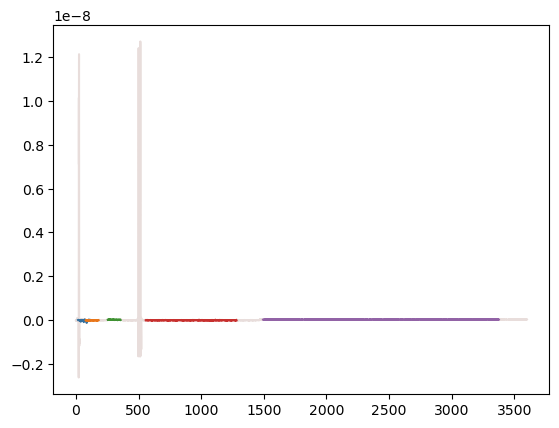

In [5]:
# Define directory of input file
run14_filedir = DATA_DIRECTORY + "Eris_run014.txt"

# Extract numpy array of proccessed time, voltage, mean current and mean current error measurments from the run
time, voltage, mean_current, mean_current_err = load_data(run14_filedir)

# Define index groups for each hv voltage applied and index pairs for the dark current / overshoot / induced current measurments respectivly
voltage_idx = [ [15, 110], [200, 300, 370, 470], [700, 1402, 1605, 3424], ] 

# Key used to store the fitted current values
key = "183"

# Extract fitted current baseline (dark current) and delta (induced - baseline)from the run
delta_curr_dict, delta_curr_err_dict, baseline_curr_dict, baseline_curr_err_dict = process_current_irradiation_alpha(
    time, mean_current, mean_current_err, voltage_idx, key, delta_curr_dict, delta_curr_err_dict,
    baseline_curr_dict, baseline_curr_err_dict,
)

if PLOT_RANGES:
    plot_irradiation_ranges(time, mean_current, voltage_idx)

### 182 (10)

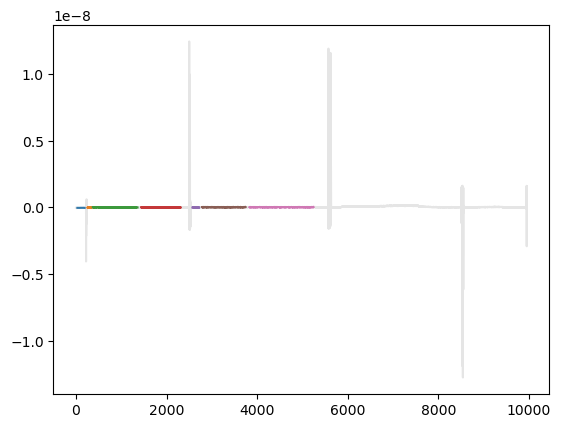

In [6]:
run12_filedir = DATA_DIRECTORY + "Eris_run012.txt"

time, voltage, mean_current, mean_current_err = load_data(run12_filedir)

voltage_idx = ( 
    (29, 184), 
    (255, 346, 369, 1324, 1402, 2242), 
    (2533, 2676, 2739, 3669, 3750, 5117), 
)

key = "182"

delta_curr_dict, delta_curr_err_dict, baseline_curr_dict, baseline_curr_err_dict = process_current_irradiation_alpha(
    time, mean_current, mean_current_err, voltage_idx, key, delta_curr_dict, delta_curr_err_dict,
    baseline_curr_dict, baseline_curr_err_dict,
)

if PLOT_RANGES:
    plot_irradiation_ranges(time, mean_current, voltage_idx)

### 171 (01)

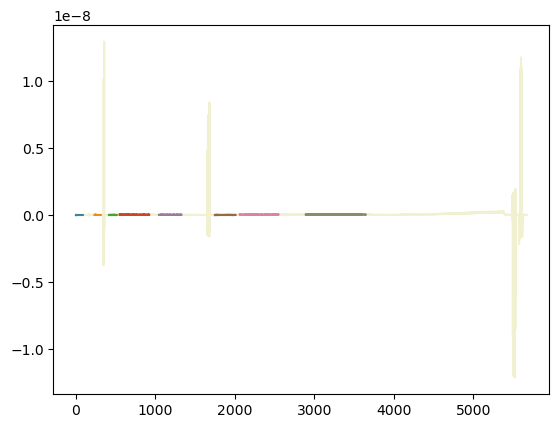

In [7]:
run16_filedir = DATA_DIRECTORY + "Eris_run016.txt"

time, voltage, mean_current, mean_current_err = load_data(run16_filedir)

voltage_idx = (
    (16, 100, 240, 318,),
    (423, 517, 550, 912, 1030, 1303), 
    (1726, 1979, 2027, 2503, 2832, 3561), 
)

key = "171"

delta_curr_dict, delta_curr_err_dict, baseline_curr_dict, baseline_curr_err_dict = process_current_irradiation_alpha(
    time, mean_current, mean_current_err, voltage_idx, key, delta_curr_dict, delta_curr_err_dict,
    baseline_curr_dict, baseline_curr_err_dict,
)

if PLOT_RANGES:
    plot_irradiation_ranges(time, mean_current, voltage_idx)

### 178 (11)

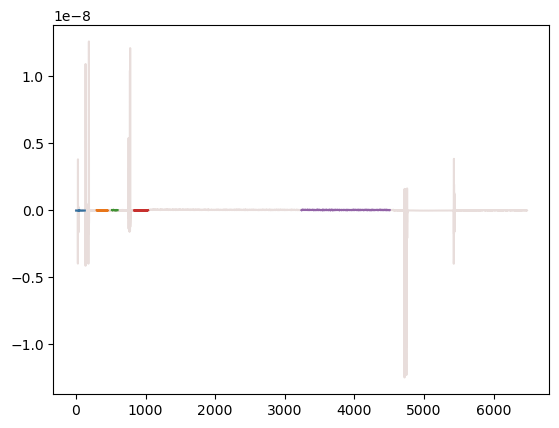

In [8]:

run15_filedir = DATA_DIRECTORY + "Eris_run015.txt"

time, voltage, mean_current, mean_current_err = load_data(run15_filedir)

voltage_idx = ( 
    (2, 123), 
    (588, 743, 800, 879), 
    (1816, 2011, 4137, 5363), 
)

key = "178"

delta_curr_dict, delta_curr_err_dict, baseline_curr_dict, baseline_curr_err_dict = process_current_irradiation_alpha(
    time, mean_current, mean_current_err, voltage_idx, key, delta_curr_dict, delta_curr_err_dict,
    baseline_curr_dict, baseline_curr_err_dict,
)

if PLOT_RANGES:
    plot_irradiation_ranges(time, mean_current, voltage_idx)

## **Alpha HV linearity for all 4 diamonds**


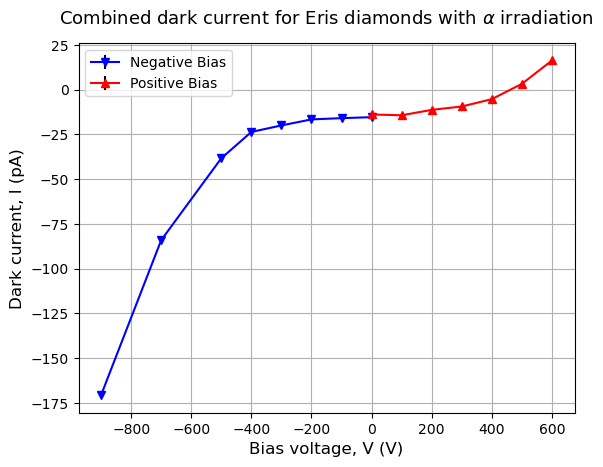

In [9]:
hv_neg = [0, -100, -200, -300, -400, -500, -700, -900]
hv_pos = [0, 100, 200, 300, 400, 500, 600]

plt.errorbar(hv_neg, 1e12*np.array(baseline_curr_neg ), yerr=1e12*np.array(baseline_curr_err_neg), ecolor="k", c="blue", label="Negative Bias", marker="v")
plt.errorbar(hv_pos, 1e12*np.array(baseline_curr_pos ), yerr=1e12*np.array(baseline_curr_err_pos), ecolor="k", c="red", label="Positive Bias", marker="^")
plt.title(r"Combined dark current for Eris diamonds with $\alpha$ irradiation", y=1.03, fontsize=13)
plt.xlabel("Bias voltage, V (V)", fontsize=12)
plt.ylabel("Dark current, I (pA)", fontsize=12)
plt.legend()
plt.grid()
plt.savefig(PLOT_DIRECTORY+"alpha_leakage_curr_vs_hv_together.png")

1.0996471982016408e-11 1.2878708818755202e-11


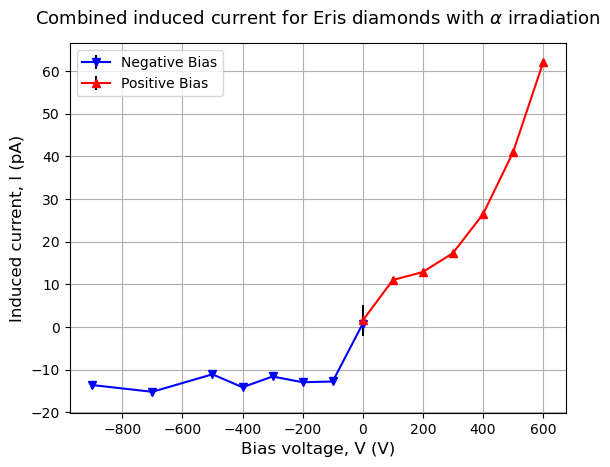

In [10]:
plt.errorbar(hv_neg, 1e12*np.array(delta_curr_neg), yerr=1e12*np.array(delta_curr_err_neg), ecolor="k", c="blue", label="Negative Bias", marker="v")
plt.errorbar(hv_pos, 1e12*np.array(delta_curr_pos), yerr=1e12*np.array(delta_curr_err_pos), ecolor="k", c="red", label="Positive Bias", marker="^")
plt.title(r"Combined induced current for Eris diamonds with $\alpha$ irradiation", y=1.03, fontsize=13)
plt.xlabel("Bias voltage, V (V)", fontsize=12)
plt.ylabel("Induced current, I (pA)", fontsize=12)
plt.legend()
plt.grid()
plt.savefig(PLOT_DIRECTORY+"alpha_induced_curr_vs_hv_together.png")
print(delta_curr_pos[1], delta_curr_pos[2])

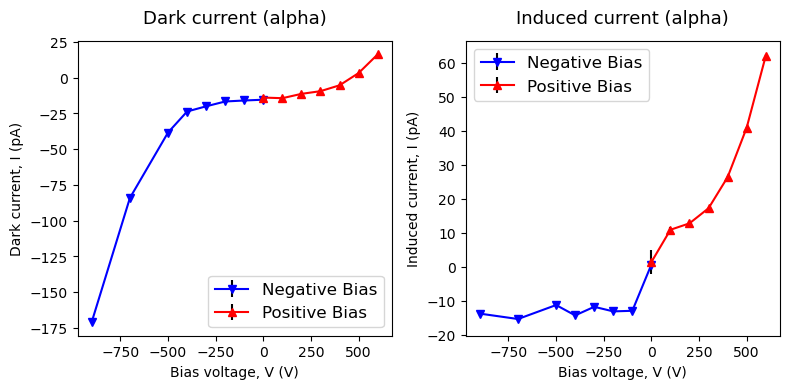

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4),)

ax1.errorbar(hv_neg, 1e12*np.array(baseline_curr_neg), yerr=1e12*np.array(baseline_curr_err_neg), ecolor="k", c="blue", label="Negative Bias", marker="v")
ax1.errorbar(hv_pos, 1e12*np.array(baseline_curr_pos), yerr=1e12*np.array(baseline_curr_err_pos), ecolor="k", c="red", label="Positive Bias", marker="^")
ax1.set_xlabel("Bias voltage, V (V)")
ax1.set_ylabel("Dark current, I (pA)")
ax1.legend(loc="lower right", fontsize=12)
ax1.set_title("Dark current (alpha)", y=1.03, fontsize=13)

ax2.errorbar(hv_neg, 1e12*np.array(delta_curr_neg), yerr=1e12*np.array(delta_curr_err_neg), ecolor="k", c="blue", label="Negative Bias", marker="v")
ax2.errorbar(hv_pos, 1e12*np.array(delta_curr_pos), yerr=1e12*np.array(delta_curr_err_pos), ecolor="k", c="red", label="Positive Bias", marker="^")
ax2.set_xlabel("Bias voltage, V (V)")
ax2.set_ylabel("Induced current, I (pA)")
ax2.legend(loc="upper left", fontsize=12)
ax2.set_title("Induced current (alpha)", y=1.03, fontsize=13)
fig.tight_layout()

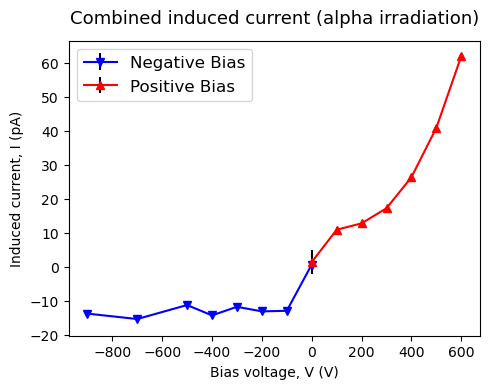

In [12]:

fig, (ax2) = plt.subplots(1, 1, figsize=(5, 4),)


ax2.errorbar(hv_neg, 1e12*np.array(delta_curr_neg), yerr=1e12*np.array(delta_curr_err_neg), ecolor="k", c="blue", label="Negative Bias", marker="v")
ax2.errorbar(hv_pos, 1e12*np.array(delta_curr_pos), yerr=1e12*np.array(delta_curr_err_pos), ecolor="k", c="red", label="Positive Bias", marker="^")
ax2.set_xlabel("Bias voltage, V (V)")
ax2.set_ylabel("Induced current, I (pA)")
ax2.legend(loc="upper left", fontsize=12)
ax2.set_title("Combined induced current (alpha irradiation)", y=1.03, fontsize=13)
fig.tight_layout()

## **Alpha HV linearity for individual diamonds**

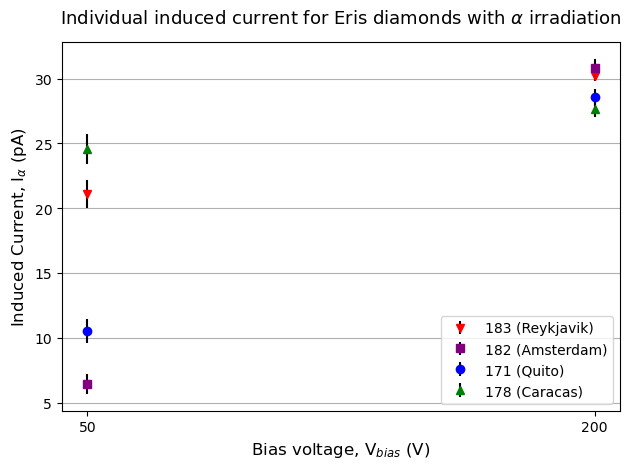

In [13]:
key_color=["red", "purple", "blue", "green"]
key_marker=["v", "s", "o", "^"]
key_label = [ "183 (Reykjavik)", "182 (Amsterdam)", "171 (Quito)",  "178 (Caracas)",]
hv_values = [50, 200]
for idx, det in enumerate(delta_curr_dict["50"].keys()):
    plt.errorbar(hv_values,1e12*np.array([delta_curr_dict[str(key)][det] for key in hv_values]), yerr=1e12*np.array([delta_curr_err_dict[str(key)][det] for key in hv_values]), ecolor="k", label=f"{key_label[idx]}", c=key_color[idx], marker=key_marker[idx], ls="")
plt.legend()
plt.xticks(hv_values)
plt.ylabel(r"Induced Current, I$_{\alpha}$ (pA)", fontsize=12)
plt.xlabel(r"Bias voltage, V$_{bias}$ (V)", fontsize=12)
plt.title(r"Individual induced current for Eris diamonds with $\alpha$ irradiation", y=1.03, fontsize=13)
plt.tight_layout()
plt.grid(axis="y")
plt.savefig(PLOT_DIRECTORY+"alpha_leakege_curr_vs_hv_individual.png")

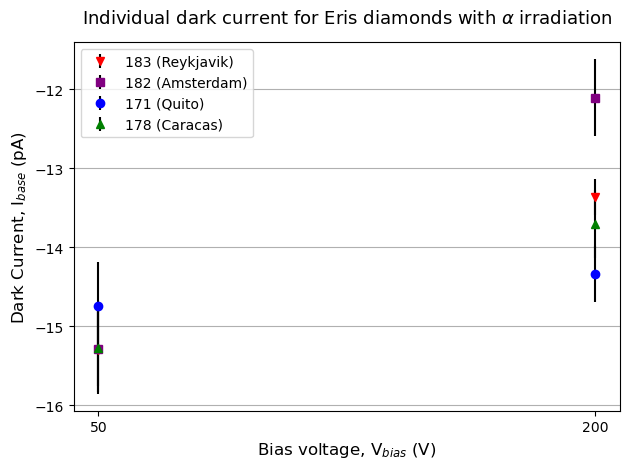

In [14]:
for idx, det in enumerate(baseline_curr_dict["50"].keys()):
    plt.errorbar(hv_values,1e12*np.array([baseline_curr_dict[str(key)][det] for key in hv_values]), yerr=1e12*np.array([baseline_curr_err_dict[str(key)][det] for key in hv_values]), ecolor="k", label=f"{key_label[idx]}", c=key_color[idx], marker=key_marker[idx], ls="")
plt.legend()
plt.xticks(hv_values)
plt.ylabel(r"Dark Current, I$_{base}$ (pA)", fontsize=12)
plt.xlabel(r"Bias voltage, V$_{bias}$ (V)", fontsize=12)
plt.title(r"Individual dark current for Eris diamonds with $\alpha$ irradiation", y=1.03, fontsize=13)
plt.tight_layout()
plt.grid(axis="y")
plt.savefig(PLOT_DIRECTORY+"alpha_induced_curr_vs_hv_individual.png")